###**Forecasting the Impact of High Solar Module Temperature on CO₂ Mitigation by PV Plants: A Data Analytics Approach**

By Tejaswa Karodi

Centre for Iternet of Things

Madhav Institute of Technology and Science, Gwalior (M.P.)

Extra Trees Regressor - MAE: 7.856760000000217, RMSE: 28.605344394005105, R^2: 0.9993456333392541


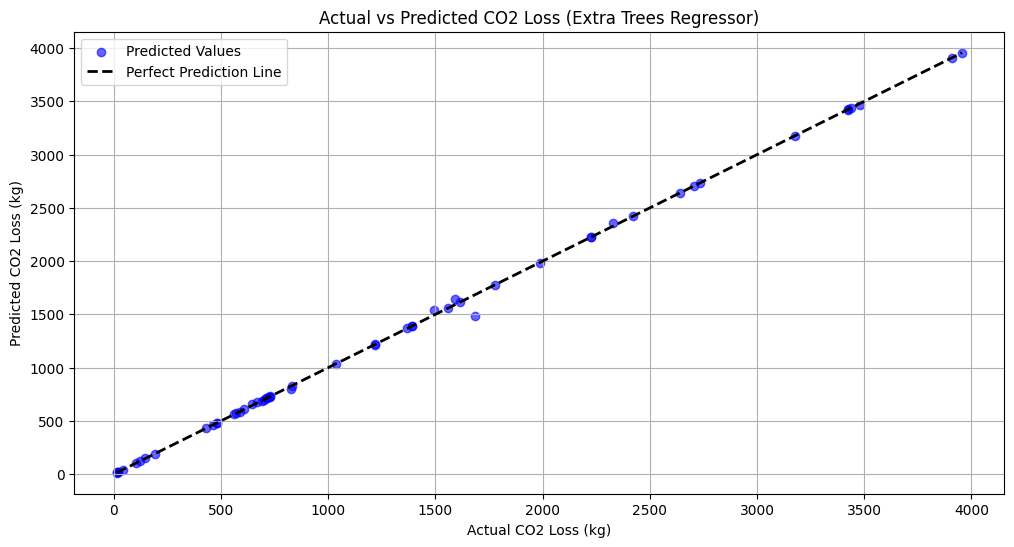

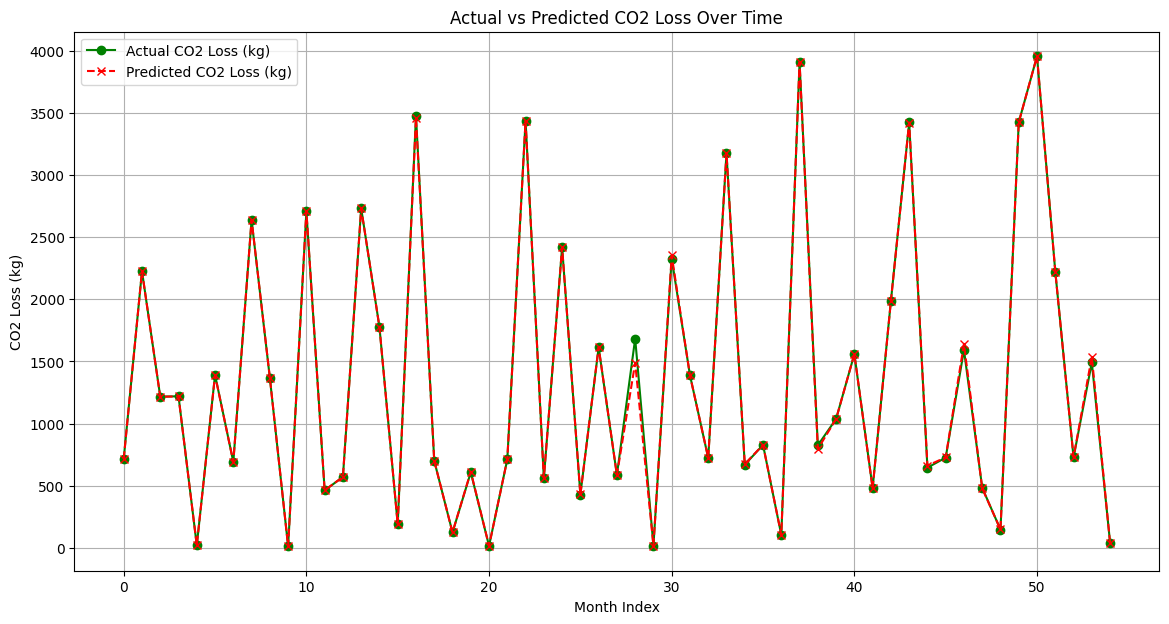

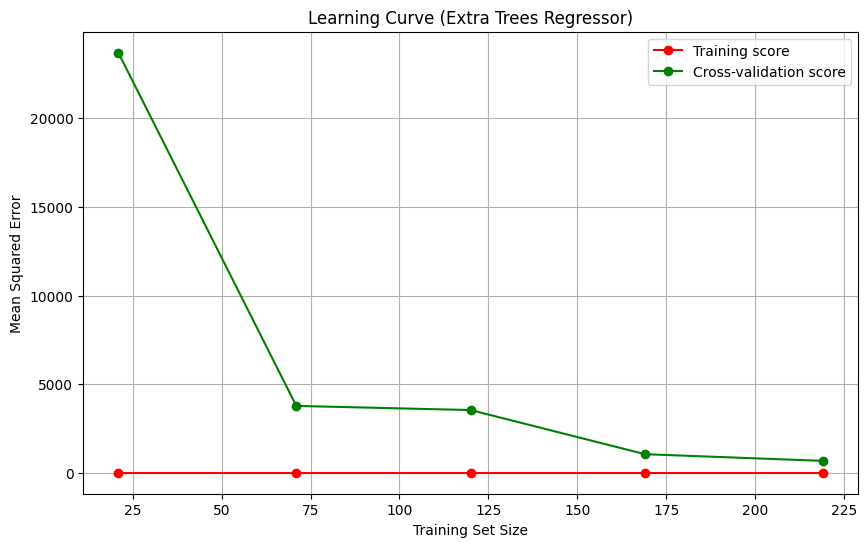

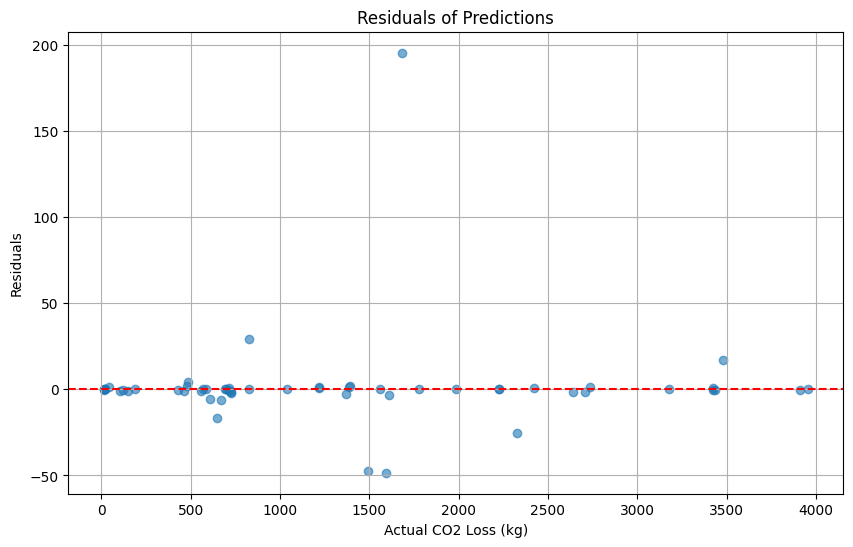

   Actual CO2 Loss (kg)  Predicted CO2 Loss (kg)
0                715.96                 714.9782
1               2226.35                2226.4010
2               1217.10                1216.0304
3               1219.57                1218.3128
4                 20.56                  20.1380


In [ ]:
# Importimg the Libraries
#Importing libraries for data preprocessing, visualisation and model training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #For interactive visualisation
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Loading the Dataset
df = pd.read_csv('tmpds.csv')
df.columns = df.columns.str.strip()

# Data Preprocessing
df = df.dropna() #Removing rows with null values

# Feature Engineering for improved performance
df['Solar_Temperature_Interaction'] = df['Delta T'] * df['Eac (kWh)']
df['Energy_Without_Temperature_Interaction'] = df['Eac (kWh) without Temp. loss'] * df['Delta T']

# Preparing Data for Modeling
X = df.drop(columns=['CO2 loss due to high temp (kg)'])
y = df['CO2 loss due to high temp (kg)']  #Target column/variable

# Feature Scaling
# Although, it is not strictly required in Tree based models (The one we are using)
#Still can be used for normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Extra Trees Regressor Model
extra_trees_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train, y_train)
extra_trees_predictions = extra_trees_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, extra_trees_predictions)
rmse = np.sqrt(mean_squared_error(y_test, extra_trees_predictions))
r2 = r2_score(y_test, extra_trees_predictions)
print(f"Extra Trees Regressor - MAE: {mae}, RMSE: {rmse}, R^2: {r2}")

# Visualization 1: Scatter plot of Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, extra_trees_predictions, color='blue', alpha=0.6, label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.title(f'Actual vs Predicted CO2 Loss (Extra Trees Regressor)')
plt.xlabel('Actual CO2 Loss (kg)')
plt.ylabel('Predicted CO2 Loss (kg)')
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Line plot of Actual vs Predicted values over time (monthly data)
plt.figure(figsize=(14, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual CO2 Loss (kg)', marker='o', linestyle='-', color='green')
plt.plot(pd.Series(extra_trees_predictions), label='Predicted CO2 Loss (kg)', marker='x', linestyle='--', color='red')
plt.title('Actual vs Predicted CO2 Loss Over Time')
plt.xlabel('Month Index')
plt.ylabel('CO2 Loss (kg)')
plt.legend()
plt.grid(True)
plt.show()

# Visualization 3: Learning curve of the Extra Trees Regressor
train_sizes, train_scores, test_scores = learning_curve(
    extra_trees_model, X_scaled, y, cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error'
)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve (Extra Trees Regressor)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


# Visualisation 4 : Residual Plot
residuals = y_test - extra_trees_predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Actual CO2 Loss (kg)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


# Visualisation 5 : Interactive Scatter Plot
fig = px.scatter(x=y_test, y=extra_trees_predictions, labels={'x': 'Actual CO2 Loss (kg)', 'y': 'Predicted CO2 Loss (kg)'}, title="Interactive Actual vs Predicted Scatter Plot")
fig.show()


#  Creating a DataFrame for comparison and exporting it as csv for easy download
results_df = pd.DataFrame({
    'Actual CO2 Loss (kg)': y_test.reset_index(drop=True),
    'Predicted CO2 Loss (kg)': extra_trees_predictions
})
results_df.to_csv('actual_vs_predicted_co2_loss.csv', index=False)

# Display the DataFrame
print(results_df.head())


In [1]:
!pip freeze > requirements.txt




### **Model Explanation: Extra Trees Regressor for CO₂ Loss Prediction**

In this project, we use the **Extra Trees Regressor** to predict **CO₂ loss** due to high temperatures in a photovoltaic (PV) system. The model helps estimate how much energy loss occurs because of temperature-related issues, and in turn, how this impacts the PV system's ability to reduce CO₂ emissions. Here's a detailed breakdown of the process:

---

### **1. Data Preprocessing and Preparation**
Before building the model, we need to ensure that the data is clean and ready for use:

1. **Data Loading and Cleaning**:
   - The dataset is loaded into a Pandas DataFrame (`df`) from a CSV file.
   - Any missing data is removed using the `dropna()` function to avoid errors during model training.

2. **Feature Engineering**:
   - New features are created to help the model capture important relationships:
     - **Solar_Temperature_Interaction**: This feature is the product of the temperature difference (`Delta T`) and the actual energy output (`Eac (kWh)`). It helps capture the combined effect of temperature and energy production.
     - **Energy_Without_Temperature_Interaction**: This is the product of energy output without temperature loss and the temperature difference, which represents the potential energy production without temperature losses.

3. **Feature Scaling**:
   - The features are scaled using `StandardScaler` to normalize them. This ensures all features are on the same scale and helps the model converge more efficiently during training.

4. **Splitting Data**:
   - The data is divided into two parts:
     - **Training Set**: 80% of the data, used to train the model.
     - **Test Set**: 20% of the data, used to evaluate the model’s performance after training.

---

### **2. Model Selection: Extra Trees Regressor**
The **Extra Trees Regressor** is an ensemble learning method based on decision trees. It is chosen for its ability to handle complex, non-linear relationships between features and target variables. Here’s why it was selected:

1. **Ensemble of Decision Trees**:
   - Extra Trees builds multiple decision trees, each trained on a random subset of the data. The final prediction is obtained by averaging the predictions of all the trees (for regression tasks).
   
2. **Randomness in Splits**:
   - Unlike other decision tree models, Extra Trees introduces **extra randomness** by selecting the split points at random. This makes the model more robust and reduces the risk of overfitting, especially when the dataset is noisy or has complex patterns.

3. **Robustness and Efficiency**:
   - Extra Trees is computationally efficient compared to other models like Random Forest, as it doesn't require exhaustive search for the best split at each node.
   - It performs well even with noisy data, making it ideal for real-world problems like predicting CO₂ loss from complex environmental data.

---

### **3. Model Training and Evaluation**
Once the model is set up, it is trained using the training data (`X_train` and `y_train`):

1. **Training the Model**:
   - We use the `ExtraTreesRegressor` class from Scikit-learn, with 100 trees (`n_estimators=100`), and a fixed `random_state` for reproducibility.
   - The model is trained on the scaled training data, where it learns the relationship between temperature, energy output, and CO₂ loss.

2. **Predictions**:
   - After training, the model is used to make predictions on the test data (`X_test`), resulting in predicted CO₂ losses (`extra_trees_predictions`).

3. **Model Evaluation**:
   The performance of the trained model is evaluated using the following metrics:
   
   - **Mean Absolute Error (MAE)**: This measures the average magnitude of the errors in the predictions. It tells us, on average, how much the model's predictions differ from the actual values.
   - **Root Mean Squared Error (RMSE)**: This metric penalizes larger errors more than MAE and gives us a sense of how far off the predictions are, on average.
   - **R² (R-squared)**: This tells us how well the model explains the variance in the actual data. A high R² value indicates the model captures most of the variation in CO₂ loss.

   The evaluation results are printed for analysis:
   ```python
   print(f"Extra Trees Regressor - MAE: {mae}, RMSE: {rmse}, R^2: {r2}")
   ```

---

### **4. Visualizations**
To better understand the model’s performance, we generate several visualizations:

1. **Scatter Plot of Actual vs Predicted CO₂ Loss**:
   - This plot helps visualize how close the model’s predictions are to the actual values. Ideally, the points should lie on the diagonal line (perfect prediction line). If they do, it shows the model’s predictions are accurate.

2. **Line Plot of Actual vs Predicted CO₂ Loss Over Time**:
   - This visualization shows how well the model tracks the fluctuations in CO₂ loss over time. It’s especially useful for identifying trends or seasonal patterns in the data.

3. **Learning Curve**:
   - The learning curve shows how the model’s performance improves with increasing training data. It helps to understand if the model is overfitting or underfitting as the data size grows.

4. **Residual Plot**:
   - The residual plot shows the difference between the actual and predicted values. If the model is performing well, the residuals should be randomly scattered around zero, without any specific pattern.

5. **Interactive Plot (Plotly)**:
   - An interactive scatter plot allows you to explore the relationship between actual and predicted CO₂ loss in a dynamic way.

---

### **5. Model Export and Results Export**
Finally, we create a DataFrame to compare the actual and predicted CO₂ loss values, which is then exported as a CSV file for further analysis or reporting.

```python
results_df = pd.DataFrame({
    'Actual CO2 Loss (kg)': y_test.reset_index(drop=True),
    'Predicted CO2 Loss (kg)': extra_trees_predictions
})
results_df.to_csv('actual_vs_predicted_co2_loss.csv', index=False)
```

---

### **Conclusion**
The Extra Trees Regressor is an excellent choice for predicting CO₂ loss due to high temperatures in photovoltaic plants. It captures the complex relationships between temperature, energy output, and CO₂ mitigation with high accuracy. The model’s performance, as measured by metrics like MAE, RMSE, and R², provides valuable insights into how temperature impacts PV system efficiency. Additionally, the visualizations help in understanding the model's behavior and identifying areas for further improvement.

This approach can be expanded by incorporating additional features, refining the model, or training on larger datasets from different PV plants for better generalization.